In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# narysowanie siatki o odpowiednich rozmiarach
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                      np.arange(y_min, y_max, .02))

# metoda do wyrysowania punktów
# jak ktoś chce może się zagłebić, ale nie jest to celem tego kursu
def plot_dataset(X_train, X_test, y_train, y_test, clf=None, plot_train=True, plot_test=True):

  # rysowanie zbioru danych  
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(1, 1, 1)
  if plot_test:
    ax.set_title("Test data")
    X = X_test
  else:
    ax.set_title("Train data")
    X = X_train
  
  # narysowanie siatki o odpowiednich rozmiarach
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                        np.arange(y_min, y_max, .02))
  
  # rysowanie decision boundary dla klsyfikatora
  if clf is not None:
    plot_colors = "bry"
    plot_step = 0.02
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

  # Rysowanie punktów treningowych
  if plot_train:
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired,
              edgecolors='k',)
  # Rysowanie punktów testowych - bardziej przezroczyste
  if plot_test:
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, alpha=0.9,
              edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  return ax

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

print(" score danych treningowych ", ada_clf.score(X_train, y_train))
print(" score danych testowych    ", ada_clf.score(X_test, y_test))

 score danych treningowych  0.968
 score danych testowych     0.896


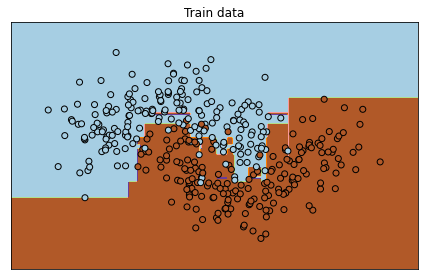

In [18]:
# wyświetlamy jak wygląda podział dla danych treningowych

ax = plot_dataset(X_train, X_test, y_train, y_test,clf = ada_clf, plot_test=False)
plt.tight_layout()
plt.show()

In [21]:
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf.fit(X_train, y_train)

print(" score danych treningowych ", tree_clf.score(X_train, y_train))
print(" score danych testowych    ", tree_clf.score(X_test, y_test))

 score danych treningowych  0.8186666666666667
 score danych testowych     0.824


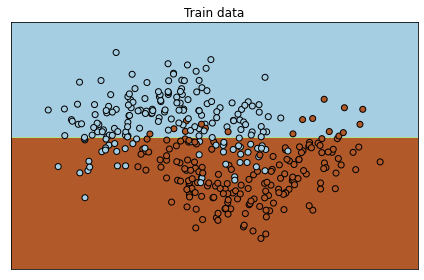

In [20]:
# wyświetlamy jak wygląda podział dla danych treningowych

ax = plot_dataset(X_train, X_test, y_train, y_test,clf = tree_clf, plot_test=False)
plt.tight_layout()
plt.show()